In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import euclidean_distances
from sklearn.random_projection import GaussianRandomProjection
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Load 20 newsgroup dataset
#We select only sci.crypt category
#Other categoris include
#sci.med and sci.space and soc.religion.christian
cat = ['sci.crypt']
data = fetch_20newsgroups(categories=cat)


In [3]:
# Create a term document matrix, with term frequencies as the values
# from the above dataset.
vectorizer = TfidfVectorizer(use_idf=False)
vector = vectorizer.fit_transform(data.data)

In [4]:
# Perform the projection. In this case we reduce the dimension to 1000
gauss_proj = GaussianRandomProjection(n_components=1000)
gauss_proj.fit(vector)
#Transform the original data to the new space
vector_t = gauss_proj.transform(vector)

In [5]:
# print transformed vector shape
print(vector.shape)
print(vector_t.shape)

(595, 16115)
(595, 1000)


In [6]:
# To validate if the transformation has preserved the distance, we
#calculate the old and the new distance between the points
org_dist = euclidean_distances(vector)
red_dist = euclidean_distances(vector_t)
diff_dist = abs(org_dist-red_dist)

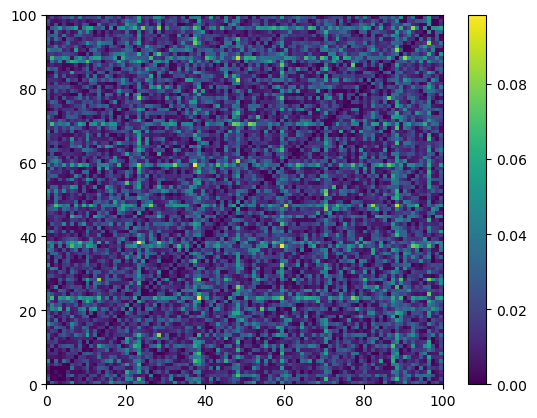

In [7]:
# We take the difference between these points and plot them
# as a heatmap (only the first 100 documents).
plt.figure()
plt.pcolor(diff_dist[0:100,0:100])
plt.colorbar()
plt.show()